### Step 1 Requierements

1. Import librairies

In [66]:
#import numpy, pandas
import numpy as np
import pandas as pd
#import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
#import seaborn
import seaborn as sns


2. Read the csv and create a dataFrame

In [29]:
trains = pd.read_csv('train.csv')
trains.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Step 2 Clean dataFrame

1. Clean the columns names

In [30]:
#We print the current columns ' name
trains.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [31]:
#We replace space, put to lower case and strip each columns names
trains.columns = [x.strip() for x in trains.columns]
trains.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

2. Analyse null column

In [32]:
#Find how many missing value in each columns
null_cols = trains.isnull().sum()
null_cols[null_cols > 0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [33]:
len(trains)

1460

In [36]:
err = 1460 - (0.02 * 1460)
err

1430.8

In [37]:
#We choose to drop column where null value > 1430.8
drop_cols = list(null_cols[null_cols > 1430.8].index)
trains = trains.drop(drop_cols, axis=1)
trains.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,0,12,2008,WD,Normal,250000


## Step 3 Find what impacts the Price

### Create a correlation matrix to have a quick overview on what could be correlated

Text(0.5, 1.0, 'Correlation matrix')

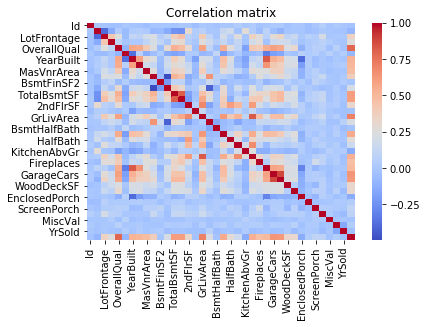

In [72]:
sns.heatmap(trains.corr(),cmap='coolwarm')
plt.title('Correlation matrix')

There are too many type of data to see correlation

### SaleCondition

1. Check if columns is always filled in

In [74]:
len(trains[trains['SaleCondition'].isnull()==True])


0

In [73]:
len(trains[trains['SalePrice'].isnull()==True])


0

2. Create histograme to know if SaleCondition impact the price

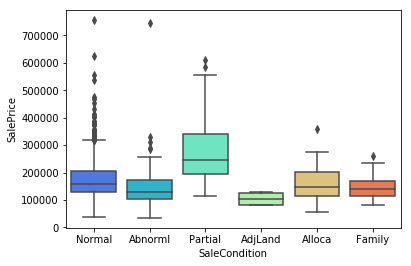

In [69]:
sns.boxplot(x='SaleCondition',y='SalePrice',data=trains,palette='rainbow')

### The Year sold

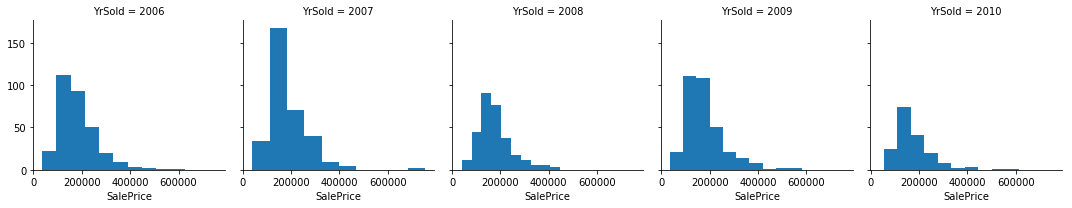

In [76]:
g = sns.FacetGrid(data=trains,col='YrSold')
g.map(plt.hist,'SalePrice')

In [92]:
new_arr = trains.groupby(trains['YrSold'], as_index=False).median()
new_arr.head(5)

,YrSold,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice
0,2006,753.5,60.0,69.0,9580.0,6.0,5.0,1974.0,1989.0,0.0,...,479.0,0.0,29.5,0.0,0.0,0.0,0.0,0.0,6.5,163995.0
1,2007,688.0,50.0,70.0,9503.0,6.0,5.0,1975.0,1995.0,0.0,...,477.0,0.0,25.0,0.0,0.0,0.0,0.0,0.0,6.0,167000.0
2,2008,705.0,55.0,67.0,9362.5,6.0,5.0,1969.5,1995.0,0.0,...,479.0,0.0,24.0,0.0,0.0,0.0,0.0,0.0,6.0,164000.0
3,2009,756.5,50.0,67.0,9375.0,6.0,5.0,1976.0,1994.5,0.0,...,478.0,32.5,20.0,0.0,0.0,0.0,0.0,0.0,7.0,162000.0
4,2010,722.0,50.0,70.0,9400.0,6.0,5.0,1971.0,1994.0,0.0,...,480.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,155000.0


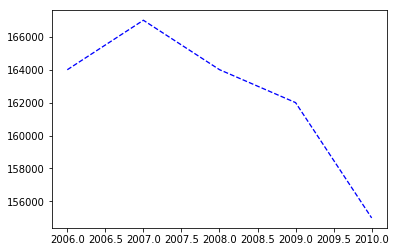

In [100]:
plt.plot(new_arr['YrSold'],new_arr['SalePrice'],lw=1.3,color="b", ls='--')


The Sale Price is decreasing 

### The month sold

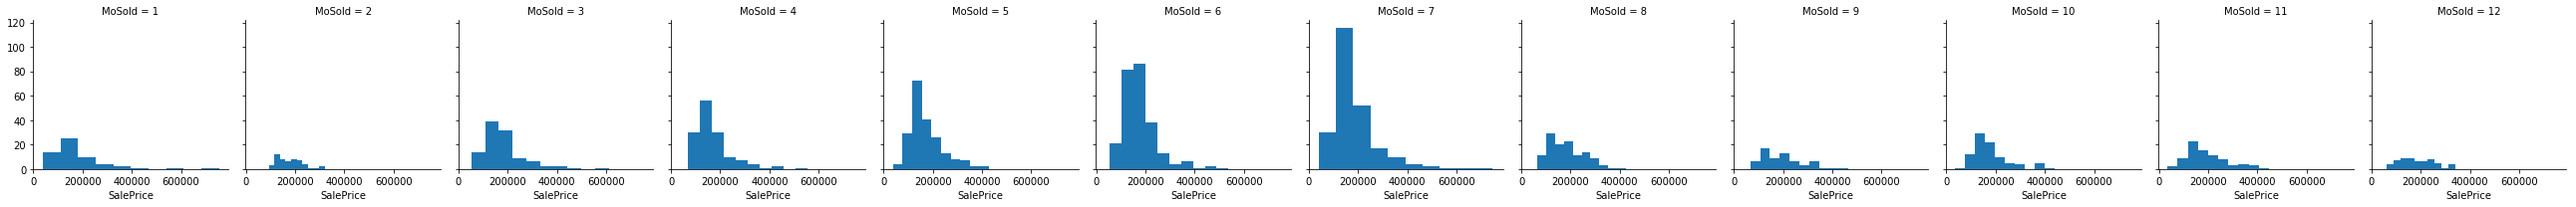

In [102]:
g = sns.FacetGrid(data=trains,col='MoSold')
g.map(plt.hist,'SalePrice')

### The impact of the year sold, the year built nd the year remod

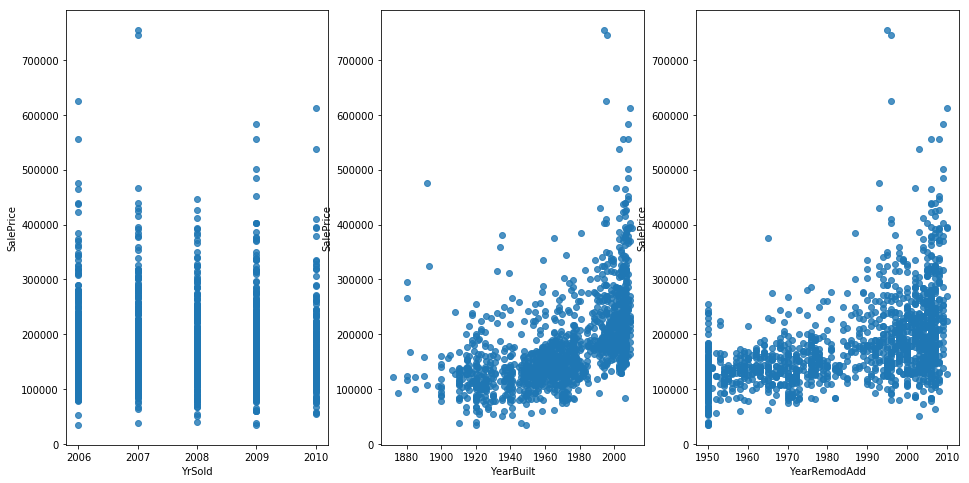

In [105]:
cols=['YrSold','YearBuilt','YearRemodAdd','SalePrice']
df=trains[cols]
fig,axes = plt.subplots(figsize = (16,8), nrows = 1, ncols = 3)
for i in range(3):
    plt.sca(axes[i])
    plt.scatter(df.iloc[:,i],df['SalePrice'], alpha = 0.8)
    plt.xlabel(df.iloc[:,i].name)
    plt.ylabel('SalePrice')

### Are they Fireplaces on trains ?

Text(0, 0.5, 'Count')

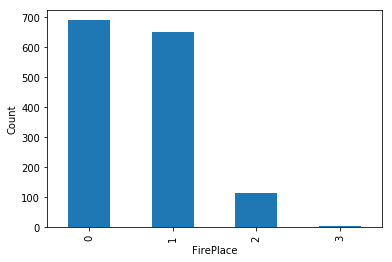

In [107]:
trains['Fireplaces'].value_counts().plot(kind='bar')
plt.xlabel('FirePlace')
plt.ylabel('Count')

In [109]:
trains[:1].values

array([[1, 60, 'RL', 65.0, 8450, 'Pave', nan, 'Reg', 'Lvl', 'AllPub',
        'Inside', 'Gtl', 'CollgCr', 'Norm', 'Norm', '1Fam', '2Story', 7,
        5, 2003, 2003, 'Gable', 'CompShg', 'VinylSd', 'VinylSd',
        'BrkFace', 196.0, 'Gd', 'TA', 'PConc', 'Gd', 'TA', 'No', 'GLQ',
        706, 'Unf', 0, 150, 856, 'GasA', 'Ex', 'Y', 'SBrkr', 856, 854, 0,
        1710, 1, 0, 2, 1, 3, 1, 'Gd', 8, 'Typ', 0, nan, 'Attchd', 2003.0,
        'RFn', 2, 548, 'TA', 'TA', 'Y', 0, 61, 0, 0, 0, 0, nan, nan, 0,
        2, 2008, 'WD', 'Normal', 208500]], dtype=object)